# Weight timeseries data analysis
### Introduction
Here we will analyze a (fake) dataset of the weight of twenty individuals over time. The data is split up into two files:

1. `weight_data.csv` with columns: `|| person | Day_1 | ... | Day_6 ||`
2. `weight_metadata.csv`: `|| person | sex | homestate | ... | feature_n ||`

The challenges involved with this assignment will include transforming, merging, and aggregating this data in different ways in order to visualize different aspects. This assignment is for someone who has had at least some exposure to [`pandas`](https://pandas.pydata.org/) and plotting with [`seaborn`](https://seaborn.pydata.org/index.html).

If you're interested in seeing how this data was generated, take a look [here](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/weight_timeseries/weight_timeseries_generate_data.ipynb).

**Note**: This exercise will likely require you to search for the syntax to accomplish each task. I have done my best to strike a balance between providing the vocabulary (and some syntax) to describe some of the concepts but I believe the best way to learn these in part is to try and find the documentation to the functions that meet your need. I will also try to include random opportunities to learn helpful syntax...

Jupyter lab tips:
- `ctrl` + `enter` will run cells
- `shift` + `tab` when your cursor is in a function will display the documentation
- output the value of a variable by having that variable be the last element of a cell
- **In general when manipulating data, print out your object at each step of manipulation**

### Created by
[Michael Silverstein](https://github.com/michaelsilverstein)

In [1]:
"""Run this cell to load libraries!"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Brief Seaborn introduction
Before using `seaborn`, take a quick saunter around their [documenation](https://seaborn.pydata.org/). Here you will see the types of figures `seaborn` makes so easy. `Seaborn` is a "wrapper" of sorts - it's built on top of Python's plotting library [`matplotlib`](https://matplotlib.org/) and allows for easy implementation of plotting categorical data.

`Seaborn` accepts "longform" data structures as input in order to generalize the categorical assocation of each element of your data. [Take a look at my brief introduction to melting and pivotting here](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/lessons/melting_pivotting.ipynb) which are the methods of data transformation that allow you to shift data between longform and wideform types.

In order to illustrate `seaborn`'s syntax, we'll start off with a super short example that highlights the use of the `hue` parameter which allows you to indicate the set of categories to color your data by when plotting.

In [53]:
"""Seaborn hue example"""
# Let's load the 'iris' dataset about different species of iris flowers
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


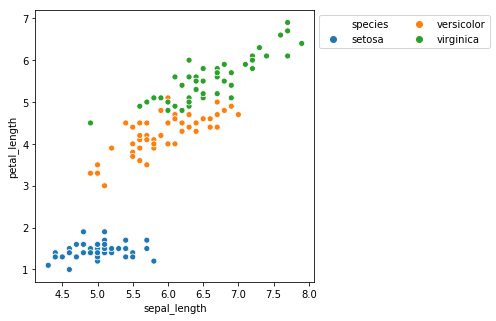

In [54]:
# Now let's plot a scatter plot of two of these features coloring each dot by the species
plt.figure(figsize=(5, 5)) # Change the plot size (optional)
sns.scatterplot('sepal_length', 'petal_length', 'species', data=df)
plt.legend(bbox_to_anchor=(1, 1), ncol=2) # Move the legend and change number of columns (optional)
plt.show()

As you can see, when using `seaborn` we pass the **name** of the columns as parameters. If you [look at the `sns.scatterplot` documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) you'll see that this function, as almost all seaborn functions, accept `x`, `y`, and `hue`, as the first three arguments.

# Start
The "assignment" or whatever starts here. From here on out, we will operate with the synthetically generated weight over time data. We will load and then do some basic analysis and plotting which will require some transformations, merging, and aggregation.

In [76]:
"""Load observed data"""
# Load wideform observed weight data with pandas
df = pd.read_csv('weight_data.csv')
df.head()

,person,Week_0,Week_1,Week_2,Week_3,Week_4,Week_5
0,P0,167.743108,174.449221,173.804793,169.578463,172.608399,180.009209
1,P1,163.719962,167.928835,170.532989,164.634668,164.443746,164.951544
2,P2,175.474169,170.828989,172.094298,172.901199,181.604867,183.650401
3,P3,171.008108,168.270346,167.779617,167.917660,161.319162,165.010405
4,P4,167.238358,169.459805,174.775500,169.221694,173.373190,172.138097


In [77]:
# Load metadata
md = pd.read_csv('weight_metadata.csv')
md.head()

,person,sex,state
0,P0,male,MA
1,P1,male,NY
2,P2,male,CA
3,P3,male,TX
4,P4,male,MA


# Timeseries
Currently `df` is a wideform dataframe. (Again for a refresher on longform vs. wideform, check [here](https://github.com/michaelsilverstein/Pandas-and-Plotting/blob/master/lessons/melting_pivotting.ipynb)). Our current goal will be to plot timeseries data with the [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) function. In order to do this, we will want our dataframe to look like the following:

```python
melted.head()
```

| person | week | weight     |
|--------|------|------------|
| P0     | 0    | 167.743108 |
| P1     | 0    | 163.719962 |
| P2     | 0    | 175.474169 |
| P3     | 0    | 171.008108 |
| P4     | 0    | 167.238358 |


Notice that the `week` column contains the `int` **not** the `str` `Week_0`. If we were to extract the `0` from `Week_0` in standard python, we could do:
```python
int('Week_0'.split('_')[1])
```
In `pandas`, we can apply string operations like `split` to an entire column:
```python
# Split every element of the column `week` in the dataframe `melted` on '_', get the 1th element, and convert the result to `int`
melted['week'] = melted.week.str.split('_').str.get(1).astype(int)
```

Notice that we can make a new column (or overwrite an existing one) with `dataframe['column_name'] = some_array`.

Once our dataframe is melted, then we can plot with `sns.lineplot` to get the following:

![weight_timeseries](figures/weight_timeseries.png)

Although `seaborn` will automatically make a color palette for us, let's generate one now to ensure consistency color assignment for each plot. Be sure to check out how palettes work in the `seaborn` examples in the documentation.
```python
# Make a dictionary that will assign a color to each person
# Check out what md.person.unique() and md.person.nunique() produce
person_pal = dict(zip(md.person.unique(), sns.husl_palette(md.person.nunique())))
```

The circles (or `marker`s is bonus ;) )

In [78]:
"""Melt dataframe"""
# Melt and convert 'week' to `int` and then print the head of the resulting dataframe
melted = df.melt('person', var_name='week', value_name='weight')
melted['week'] = melted.week.str.split('_').str.get(1).astype(int)
melted.head()

,person,week,weight
0,P0,0,167.743108
1,P1,0,163.719962
2,P2,0,175.474169
3,P3,0,171.008108
4,P4,0,167.238358


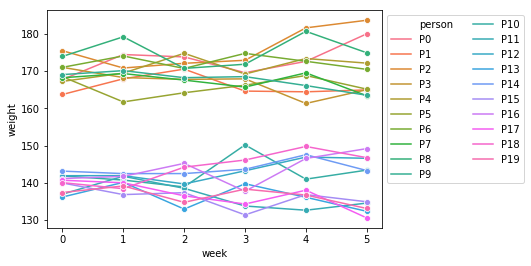

In [79]:
"""Plot"""
# Plot weight over time for each individual by coloring by each individual
sns.lineplot('week', 'weight', 'person', data=melted, marker='o', markersize=6)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('figures/weight_timeseries', bbox_inches='tight')
plt.show()

# Timeseries + metadata
We can already see some stratification in the data - there are clearly two larger groupings of types of people and then within each group it seems as if some people have gained weight and others have lost weight. 

Let's use the associated **metadata** to see if we can explore if there are any underlying trends. First we will have to [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) the metadata with our observed data. Merging allows you to combine two tables on their shared (or user-specified) columns. The head of your merged dataframe should look like:
```python
merged.head()
```

| person | week | weight     | sex  | state |
|--------|------|------------|------|-------|
| P0     | 0    | 167.743108 | male | MA    |
| P0     | 1    | 174.449221 | male | MA    |
| P0     | 2    | 173.804793 | male | MA    |
| P0     | 3    | 169.578463 | male | MA    |
| P0     | 4    | 172.608399 | male | MA    |


After merging we can use the resulting dataframe to add more information to our plot by using the `style` and `size` parameters:

![timeseries+md](figures/weight_timeseries+md.png)

### Questions
- `sns.lineplot` will default to using dashes for the column passed to the `style` column - how can we turn off the dashses and use markers?
- how can we change the thickness of the lines?

In [80]:
"""Merge metadata"""
# Merge metadata to 'melted' and print the head
merged = melted.merge(md)
melted.head()

,person,week,weight
0,P0,0,167.743108
1,P1,0,163.719962
2,P2,0,175.474169
3,P3,0,171.008108
4,P4,0,167.238358


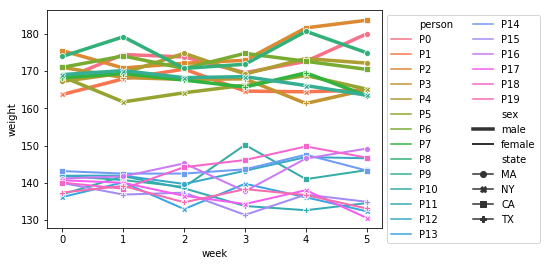

In [81]:
"""Plot"""
# Plot the same as above but add 'sex' and 'weight' information as `size` and `style` respectively
sns.lineplot('week', 'weight', 'person', 'sex', 'state', merged, dashes=False, markers=True, sizes=(2, 3.5))
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('figures/weight_timeseries+md', bbox_inches='tight')
plt.show()

# Comparing weight by sex
One feature (or column) that clearly stratifies the data is the `sex` and we could use a [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to visualize these differences more directly. If we are to properly comapre the differences in weight between sex we will have to do so with [independent](https://en.wikipedia.org/wiki/Independence_(probability_theory)) datapoints - which in our case means that we won't want to have multiple datapoints per person since these data are indeed dependent on each other. 

There are multiple approaches we could take to generate an independent dataset from our current one. We could choose just one timepoint (sample from our data) or aggregate our data in some way, like by summing or averaging the data from each person. For this example let's take the mean weight from each person to investigate the effect sex has on weight.

We can take the weight in two ways:
```python
"""1) Use the original dataframe"""
# Set 'person' as the index and then take the mean over the rows (axis=1) (Note: the default is axis=0, the columns)
#  Reset index and name it 'weight' and then we can `merge` out metadata to the resulting dataframe
means = df.set_index('person').mean(1).reset_index(name='weight')
"""2) Use melted dataframe with groupby"""
# Group data by 'person', take the mean of each group's weight, and then reset the index. We can then add our metadata back
# We want to reset the index so that we can pass it as a column to our plotting functions
means = merged.groupby('person').weight.mean().reset_index()
# An alternative that illustrates grouping by multiple columns and avoids needing to re-merge our metadata:
means = merged.groupby(['person', 'sex', 'state']).week.mean().reset_index()
```
Both of the above will produce the same result. I encourage you to look at the [`pd.groupby` documentation](https://pandas.pydata.org/pandas-docs/version/0.22/groupby.html) and to try and approach this challenge using it. This is just a measley introduction to `pd.groupby`, but it is an endlessly valuable tool and a complicated one to wrap your mind around at first, so I hope this can serve as a simple introduction.

After getting the mean weights, we can plot resulting data in a boxplot and then also overlay the underlying data using [`sns.swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). When you do this, you should get a plot that looks like:

![mean_boxplot](figures/mean_weight_sex.png)

### Questions
- How can we change the colors from their default for the boxplot? $\implies$ Check out the `palette` parameter
- For the swarmplot?

In [82]:
"""Take the mean weight of each person over the 6 weeks"""
# Take mean weight and merge the metadata for each person and then print the head of the resulting dataframe
mean_weight = merged.groupby('person').weight.mean().reset_index().merge(md)
mean_weight.head()

,person,weight,sex,state
0,P0,173.032199,male,MA
1,P1,166.035291,male,NY
2,P10,142.689575,female,CA
3,P11,136.384999,female,TX
4,P12,143.390333,female,MA


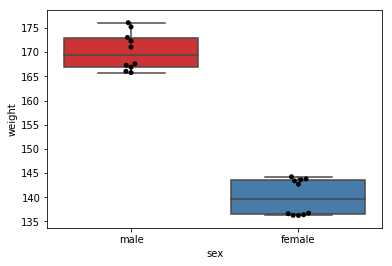

In [83]:
"""Plot box plot"""
# Let's do a boxplot
sns.boxplot('sex', 'weight', data=mean_weight, palette='Set1')
# Then let's do a swarmplot
sns.swarmplot('sex', 'weight', data=mean_weight, color='k')
plt.savefig('figures/mean_weight_sex', bbox_inches='tight')
# Now when we plot they will be overlayed
plt.show()

## By state and then sex
This clearly is a difference between the weight and the males and females here! Let's break this data down further to see if there are further relations. Since these people are from different states, we may want to control for which state they are from in our analysis, so let's break the data down by state and then by sex:

![boxplot_state](figures/mean_weight_state.png)

### Questions:
- How do we align the `swarmplot` points with the boxes when using a `hue`? $\implies$ Check out the `dodge` parameter

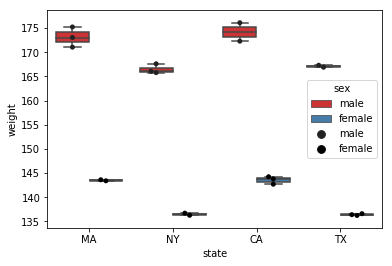

In [84]:
"""Plot by state and then sex"""
sns.boxplot('state', 'weight', 'sex', mean_weight, palette='Set1')
sns.swarmplot('state', 'weight', 'sex', mean_weight, dodge=True, color='k')
plt.savefig('figures/mean_weight_state', bbox_inches='tight')
plt.show()

# Timeseries $\Delta$ Baseline
If we were interested in which person gained or lost "the most weight", what we really may be asking is who changed the most from their baseline? To do this, will have to calculated the change in each person's baseline, which in this case is their weight at week 0. We can do this in a myraid of ways, but my preferred method is the following because it allows you to see all of the data involved in your cacluation:

| person | week | weight     | sex  | state | baseline   | delta    |
|:------:|-----|------------|------|-------|------------|----------|
|   P0   |    0 | 167.743108 | male | MA    | 167.743108 | 0.000000 |
|   P0   |    1 | 174.449221 | male | MA    | 167.743108 | 6.706113 |
|   P0   |    2 | 173.804793 | male | MA    | 167.743108 | 6.061685 |
| P0     | 3    | 169.578463 | male | MA    | 167.743108 | 1.835354 |
| P0     | 4    | 172.608399 | male | MA    | 167.743108 | 4.865290 |

After merging the baseline of each patient to our dataframe, we can compute the delta column above with:
```python
merged['delta'] = merged.weight - merged.baseline
```
In general, `pandas` allows us to perform vector operations on [`Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (the information in each column), so we can easily operate on one or multiple columns as vectors.

Now, we can plot the change from baseline, much like how we plotted the absolute weight before:
![baseline_timeseries](figures/baseline_timeseries.png)
### Questions
- How can we get the black line at zero? $\implies$ check out [`plt.axhline`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axhline.html)
- How could we plot the percent change from baseline?

## Challenge
How can we color by sex?

![baseline_colored](figures/baseline_timeseries_colored.png)

I've put some hints in the cell below

In [85]:
"""Compute difference from baseline weight"""
# First, let's get the baseline weight for each person

# Next, let's merge that with out dataframe
merged_base = merged.merge(merged[merged.week==0][['person', 'weight']].rename(columns={'weight': 'baseline'}))
# Now let's calculate the difference between the weight at each point and the baseline
merged_base['delta'] = merged_base.weight - merged_base.baseline
merged_base.head()

,person,week,weight,sex,state,baseline,delta
0,P0,0,167.743108,male,MA,167.743108,0.000000
1,P0,1,174.449221,male,MA,167.743108,6.706113
2,P0,2,173.804793,male,MA,167.743108,6.061685
3,P0,3,169.578463,male,MA,167.743108,1.835354
4,P0,4,172.608399,male,MA,167.743108,4.865290


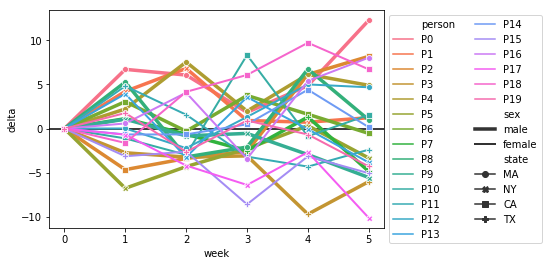

In [103]:
"""Plot change from baseline timeseries"""
# Using lineplot, let's plot the change from baseline timeseries
sns.lineplot('week', 'delta', 'person', 'sex', 'state', merged_base, dashes=False, markers=True, sizes=(2, 3.5))
plt.axhline(0, c='k', zorder=0)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('figures/baseline_timeseries', bbox_inches='tight')
plt.show()

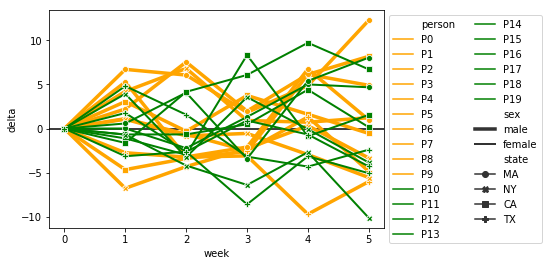

In [108]:
"""Challenge: Plot change from baseline timeseries and color by sex"""
# That's a pretty busy plot. Although we are using the line thickness to delineate sex, let's make differences
# more clear by using different colors for each sex
# We assign colors using the `palette` argument which chooses a color for each element of the `hue`
sex_pal = {'male': 'orange', 'female': 'green'}
person_pal = md.set_index('person').sex.map(sex_pal)
sns.lineplot('week', 'delta', 'person', 'sex', 'state', merged_base, dashes=False, markers=True, sizes=(2, 3.5),
            palette=person_pal)
plt.axhline(0, c='k', zorder=0)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('figures/baseline_timeseries_colored', bbox_inches='tight')
plt.show()

# Timeseries facetted by state
That is some busy shit going on up there... Like before with the boxplots, let's control our analysis for which state each person is from by breaking up these timeseries by state by using the [extremely powerful function sns.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html). This function allows us to create a grid of plots by choosing a column to "facet" on - just like how we can use `seaborn` to color by information in one column, `FacetGrid` will allow us to choose a column to make individual plots in a grid with. This is a miserable description - it's close to dinner time and I'm hungry - please look at the documentation.

Facetting change in baseline by state we get

![facet_state](figures/facet_timeseries.png)

### Questions
1. How can we get only two plots per row?
2. How can we get each plot to be wider?
3. How can we get the black zero line on each plot?

For scatter and lineplots, you can also use the [`sns.relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) to facet, but I wanted to show you `FacetGrid` since it is more generalizable.

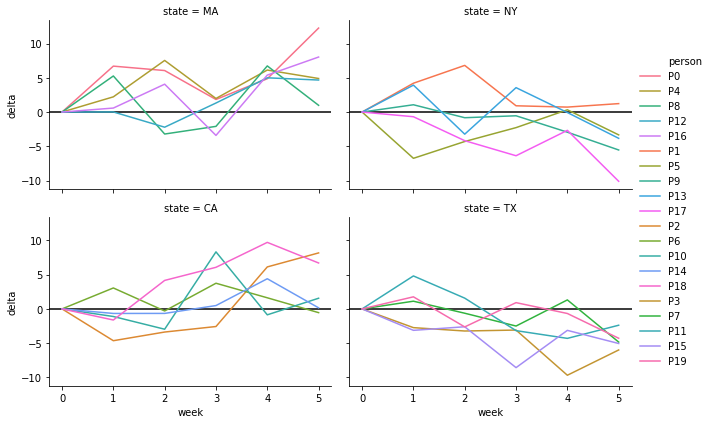

In [123]:
"""Facet change in baseline timeseries by state"""
pal = dict(zip(md.person.unique(), sns.husl_palette(md.person.nunique())))
g = sns.FacetGrid(merged_base, col='state', col_wrap=2,aspect=1.5)
g.map(sns.lineplot, 'week', 'delta', 'person', palette=pal, dashes=False, markers=True).add_legend()
for ax in g.axes.ravel():
    ax.axhline(0, c='k', zorder=0)
plt.savefig('figures/facet_timeseries')
plt.show()